In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

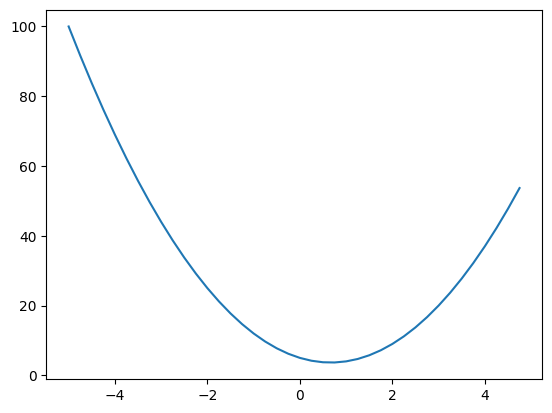

In [7]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [17]:
h = 0.000001
x = -3.0
(f(x + h) - f (x)) / h

-21.999997002808414

In [21]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [22]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [75]:
class Value:

  def __init__(self, data, _children=(), _op='', label='') -> None:
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self) -> str:
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    return Value(self.data + other.data, _children = (self, other), _op = '+')
  
  def __mul__(self, other):
    return Value(self.data * other.data, _children = (self, other), _op = '*')
  
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'

d = e + c; d.label='d'

f = Value(-2.0, label='f')
L = d*f; L.label='L'

In [120]:
from graphviz import Digraph

def trace(root):

  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)

  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR - left to right
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))

    dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label= n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

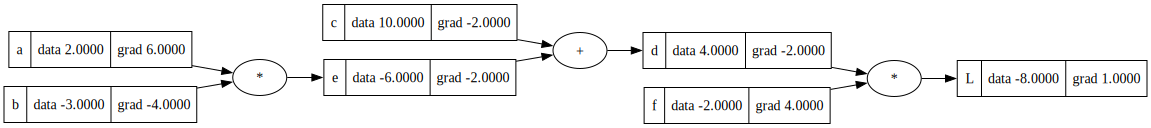

In [121]:
# manually setting grad values with respect to L
L.grad = 1
d.grad = -2.0
f.grad = 4.0

c.grad = 1 * -2.0
e.grad = 1 * -2.0

# (dL / de) * (de / da)
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0


draw_dot(L)

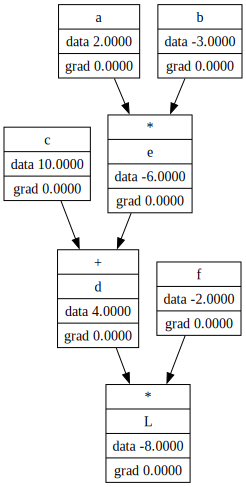

In [76]:
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir':'DT'}) # LR - left to right
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))

    if n._op:
      dot.node(name=uid, label="{ %s | %s | data %.4f | grad %.4f }" % (n._op, n.label, n.data, n.grad), shape='record')
    else:
      dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)))

  return dot

draw_dot(L)

In [122]:
def num_grad_example():
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'

  d = e + c; d.label='d'

  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  a.data += h
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'


  f = Value(-2.0, label='f')
  L = d*f; L.label='L'

  L2 = L.data

  print((L2 - L1) / h)

num_grad_example()

6.000000000021544


In [123]:
def f(x): 
  return x*0.25

# avg rate of change of f(x) over interval [x, x + h]
def der(f, x, h):
  return (f(x + h) - f(x)) / h

der(f = f, x = 50, h = 0.00000005)

0.24999998515795596

In [1]:
def is_point_inside_circle(x, y, center_x, center_y, radius):
    # Calculate the distance from the point to the center of the circle
    distance_squared = (x - center_x)**2 + (y - center_y)**2

    # Check if the distance is less than or equal to the square of the radius
    return distance_squared <= radius**2

# Example usage
circle_radius = 50
circle_center_x = 30
circle_center_y = 40
point_x = 45
point_y = 55

if is_point_inside_circle(point_x, point_y, circle_center_x, circle_center_y, circle_radius):
    print(f"The point ({point_x}, {point_y}) is inside the circle.")
else:
    print(f"The point ({point_x}, {point_y}) is outside the circle.")

The point (45, 55) is inside the circle.
